In [19]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df1 = pd.read_csv("1990-1999.csv")
df2 = pd.read_csv("2000-2012.csv")
df3 = pd.read_csv("2012-2014.csv")
df4 = pd.read_csv("2015-2016.csv")
df5 = pd.read_csv("2017-2024.csv")

In [21]:
def year(df,Month):
    print(df['Year'].min())
    print(df['Year'].max())
    return year


In [22]:
print(df1.columns)
print(df2.columns)
print(df3.columns)
print(df4.columns)
print(df5.columns)

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')
Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')
Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')
Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')
Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')


In [23]:
merge1 = pd.concat([df1,df2])

In [24]:
merge2 = pd.concat([merge1,df3])

In [25]:
merge2

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0
...,...,...,...,...,...,...,...,...,...,...
52198,2014-12,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0
52199,2014-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0
52200,2014-12,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0
52201,2014-12,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0


In [8]:
df4_df5_megre = pd.concat([df4,df5])

In [9]:
df = pd.merge(merge2,df4_df5_megre,how='outer')

In [10]:
df.drop(columns='remaining_lease',inplace=True)

In [11]:
df.isna().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

In [12]:
# Replace 'date_column' with the name of your date column
df['month'] = pd.to_datetime(df['month'])
# Group by the desired time period (e.g., year, month, day)
date_counts = df['month'].dt.to_period('M').value_counts().sort_index()

# Print the counts
print(date_counts)


month
1990-01    1507
1990-02     931
1990-03    1150
1990-04    1047
1990-05     778
           ... 
2024-02    2125
2024-03    2049
2024-04    2375
2024-05    2511
2024-06     733
Freq: M, Name: count, Length: 414, dtype: int64


In [13]:
df["Address"] = df['street_name'] + " " + "Block" + " " + df['block'] 

In [14]:
df.drop(columns='street_name',inplace=True)

In [15]:
df['Month'] = df['month'].dt.month

In [16]:
df['Year'] = df['month'].dt.year

In [17]:
df.drop(columns='month',inplace=True)

In [27]:
year(df,df['Year'])

1990
2024


<function __main__.year(df, Month)>

Text(0, 0.5, 'Frequency')

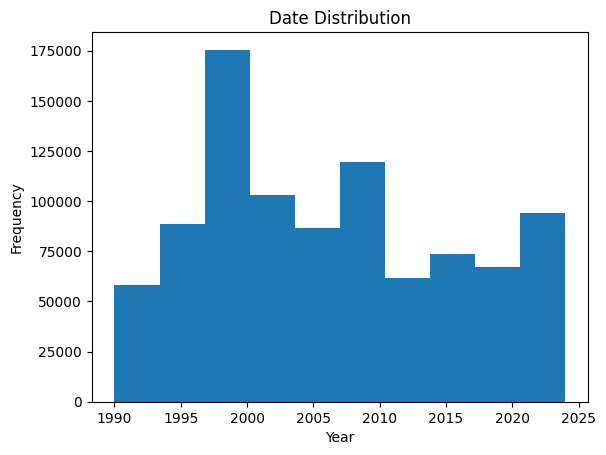

In [28]:
df['Year'].plot(kind='hist',)
plt.title('Date Distribution')
plt.xlabel('Year')
plt.ylabel('Frequency')

Qucik summary of the dataset


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
floor_area_sqm,927769.0,95.690326,25.824063,28.0,73.0,93.0,113.0,307.0
lease_commence_date,927769.0,1988.281130,10.668351,1966.0,1981.0,1986.0,1996.0,2020.0
resale_price,927769.0,320938.295228,170599.383121,5000.0,193000.0,298000.0,418000.0,1588000.0
Month,927769.0,6.550306,3.412481,1.0,4.0,7.0,10.0,12.0
Year,927769.0,2006.180235,9.328823,1990.0,1999.0,2005.0,2014.0,2024.0


## insight take from the summary
1. this dataset have 1990 - 2024 year
2. floor_area_sqm avegre squre feet is 95.0


In [29]:
df.describe(include='object')

,town,flat_type,block,storey_range,flat_model,Address
count,927769,927769,927769,927769,927769,927769
unique,27,8,2711,25,34,9837
top,TAMPINES,4 ROOM,2,04 TO 06,Model A,BOON LAY PL Block 211
freq,80032,352627,4591,232782,195010,822


# insight take from the object datatps

1. 27 different twon in this data 
2. The Top Recoreds made in TAMPINES city 
3. 9837 house are there in this dataset

In [30]:
# I need to cheack the which twon have hights sales price 


town_df = df.groupby('town')['resale_price'].sum()

In [ ]:
df.head(1)

,town,flat_type,block,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Address,Month,Year
0,ANG MO KIO,1 ROOM,309,04 TO 06,31.0,IMPROVED,1977,6000.0,ANG MO KIO AVE 1 Block 309,1,1990


In [31]:
dff = df.select_dtypes('number')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927769 entries, 0 to 927768
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   town                 927769 non-null  object 
 1   flat_type            927769 non-null  object 
 2   block                927769 non-null  object 
 3   storey_range         927769 non-null  object 
 4   floor_area_sqm       927769 non-null  float64
 5   flat_model           927769 non-null  object 
 6   lease_commence_date  927769 non-null  int64  
 7   resale_price         927769 non-null  float64
 8   Address              927769 non-null  object 
 9   Month                927769 non-null  int32  
 10  Year                 927769 non-null  int32  
dtypes: float64(2), int32(2), int64(1), object(6)
memory usage: 70.8+ MB


In [ ]:
dff.corr()

,floor_area_sqm,lease_commence_date,resale_price,Month,Year
floor_area_sqm,1.000000,0.385237,0.561836,0.002974,0.062941
lease_commence_date,0.385237,1.000000,0.538201,0.003388,0.431558
resale_price,0.561836,0.538201,1.000000,0.004077,0.675131
Month,0.002974,0.003388,0.004077,1.000000,-0.026130
Year,0.062941,0.431558,0.675131,-0.026130,1.000000


<Axes: >

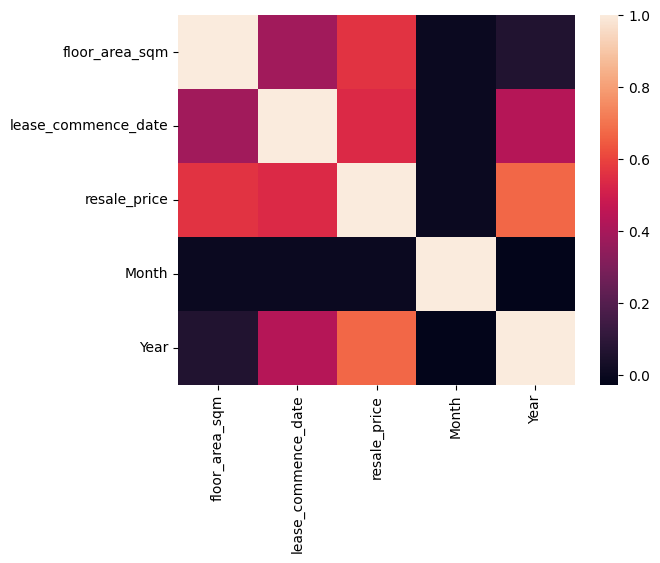

In [ ]:
sns.heatmap(dff.corr())

In [33]:
df[["storey_start", "storey_end"]]= df["storey_range"].str.split(" TO ",expand=True)

In [34]:
df.drop(columns='storey_range',inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927769 entries, 0 to 927768
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   town                 927769 non-null  object 
 1   flat_type            927769 non-null  object 
 2   block                927769 non-null  object 
 3   floor_area_sqm       927769 non-null  float64
 4   flat_model           927769 non-null  object 
 5   lease_commence_date  927769 non-null  int64  
 6   resale_price         927769 non-null  float64
 7   Address              927769 non-null  object 
 8   Month                927769 non-null  int32  
 9   Year                 927769 non-null  int32  
 10  storey_start         927769 non-null  object 
 11  storey_end           927769 non-null  object 
dtypes: float64(2), int32(2), int64(1), object(7)
memory usage: 77.9+ MB


In [36]:
df.head(1)

,town,flat_type,block,floor_area_sqm,flat_model,lease_commence_date,resale_price,Address,Month,Year,storey_start,storey_end
0,ANG MO KIO,1 ROOM,309,31.0,IMPROVED,1977,6000.0,ANG MO KIO AVE 1 Block 309,1,1990,04,06


In [37]:
df['storey_start'] = df['storey_start'].astype('int')
df['storey_end'] = df['storey_end'].astype('int')


In [38]:
encode = df.select_dtypes('object')
encode

,town,flat_type,block,flat_model,Address
0,ANG MO KIO,1 ROOM,309,IMPROVED,ANG MO KIO AVE 1 Block 309
1,ANG MO KIO,1 ROOM,309,IMPROVED,ANG MO KIO AVE 1 Block 309
2,ANG MO KIO,1 ROOM,309,IMPROVED,ANG MO KIO AVE 1 Block 309
3,ANG MO KIO,1 ROOM,309,IMPROVED,ANG MO KIO AVE 1 Block 309
4,ANG MO KIO,3 ROOM,110,NEW GENERATION,ANG MO KIO AVE 4 Block 110
...,...,...,...,...,...
927764,YISHUN,5 ROOM,865,Improved,YISHUN ST 81 Block 865
927765,YISHUN,EXECUTIVE,328,Apartment,YISHUN RING RD Block 328
927766,YISHUN,EXECUTIVE,723,Maisonette,YISHUN ST 71 Block 723
927767,YISHUN,EXECUTIVE,826,Maisonette,YISHUN ST 81 Block 826


In [39]:
encode.nunique()

town            27
flat_type        8
block         2711
flat_model      34
Address       9837
dtype: int64

In [40]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder

lable = LabelEncoder()

df['town'] = lable.fit_transform(df['town'])
df['flat_type'] = LabelEncoder().fit_transform(df['flat_type'])
df["flat_model"]= OrdinalEncoder().fit_transform(df[["flat_model"]])


In [41]:
df.drop(columns=['block','Address'],inplace=True)

<Axes: >

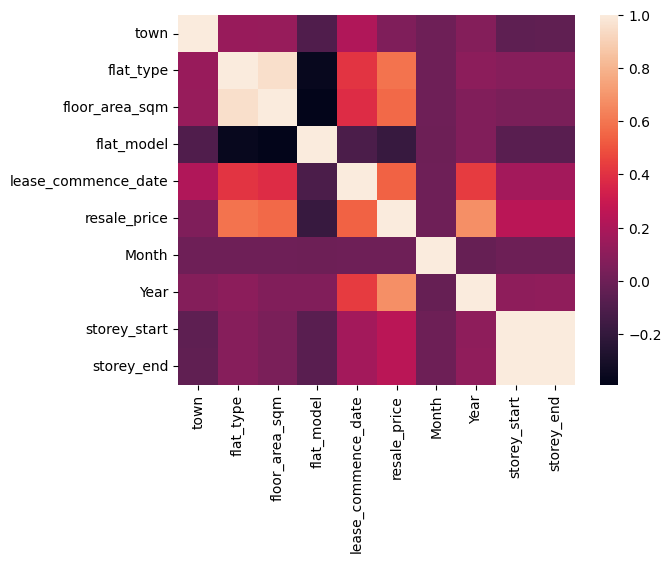

In [42]:
sns.heatmap(df.corr())

In [ ]:
# choosing the "LabelEncoder" for "town",and "OrdinalEncoder" for the "flat_model" and the "flat_type"
df_5["town"]= LabelEncoder().fit_transform(df_5["town"])
df_5["flat_model"]= OrdinalEncoder().fit_transform(df_5[["flat_model"]])
df_5["flat_type"]= OrdinalEncoder().fit_transform(df_5[["flat_type"]])

In [43]:
# detecting the skewed columns using plot
def plot(df,column):
  #distplot
  plt.figure(figsize=(15,4))
  plt.subplot(1,3,1)
  sns.distplot(df[column])
  plt.title("distplot for"+" "+column)

  #histogram plot

  plt.subplot(1,3,2)
  sns.histplot(df, x= column, kde= True, bins=30,color="salmon")
  plt.title("histogram plot for"+" "+column)

  #boxplot

  plt.subplot(1,3,3)

  sns.boxplot(df, x=column)
  plt.title("Box plot for"+" "+column)

C:\Users\anand\AppData\Local\Temp\ipykernel_13384\1049427475.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


None


C:\Users\anand\AppData\Local\Temp\ipykernel_13384\1049427475.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


None


C:\Users\anand\AppData\Local\Temp\ipykernel_13384\1049427475.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


None


C:\Users\anand\AppData\Local\Temp\ipykernel_13384\1049427475.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


None


C:\Users\anand\AppData\Local\Temp\ipykernel_13384\1049427475.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


None


C:\Users\anand\AppData\Local\Temp\ipykernel_13384\1049427475.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


None


C:\Users\anand\AppData\Local\Temp\ipykernel_13384\1049427475.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


None


C:\Users\anand\AppData\Local\Temp\ipykernel_13384\1049427475.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


None


C:\Users\anand\AppData\Local\Temp\ipykernel_13384\1049427475.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


None


C:\Users\anand\AppData\Local\Temp\ipykernel_13384\1049427475.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


None


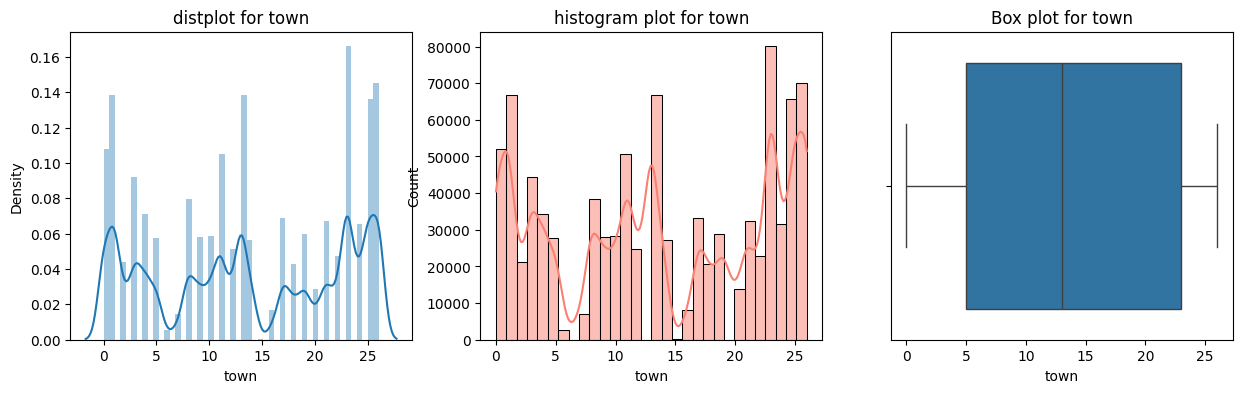

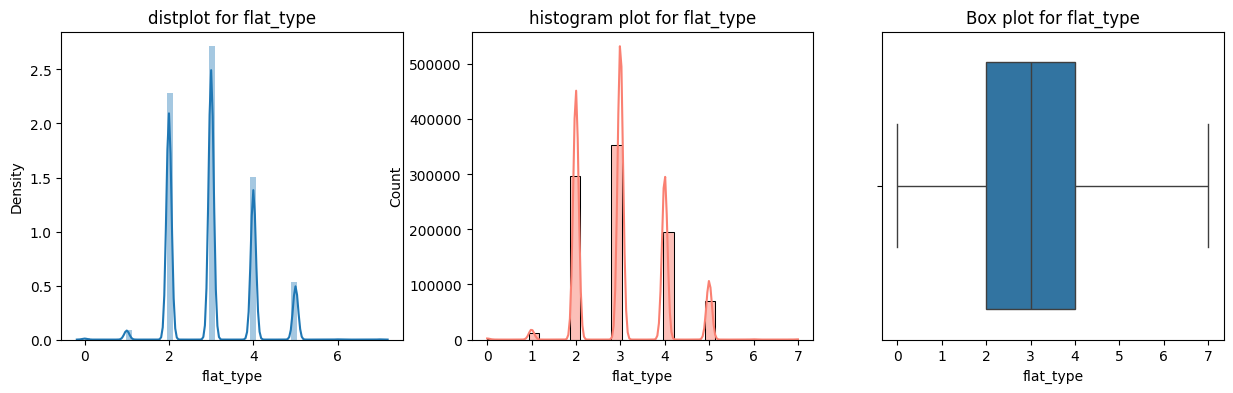

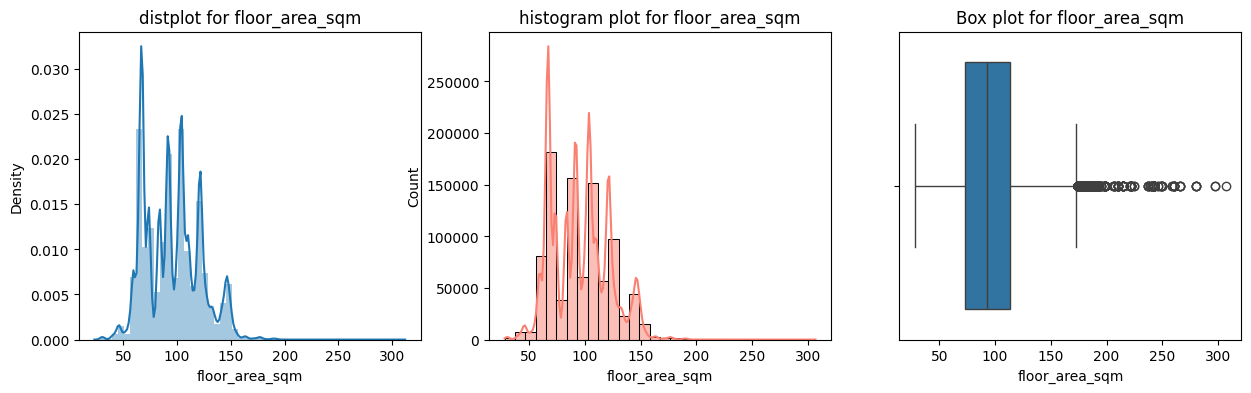

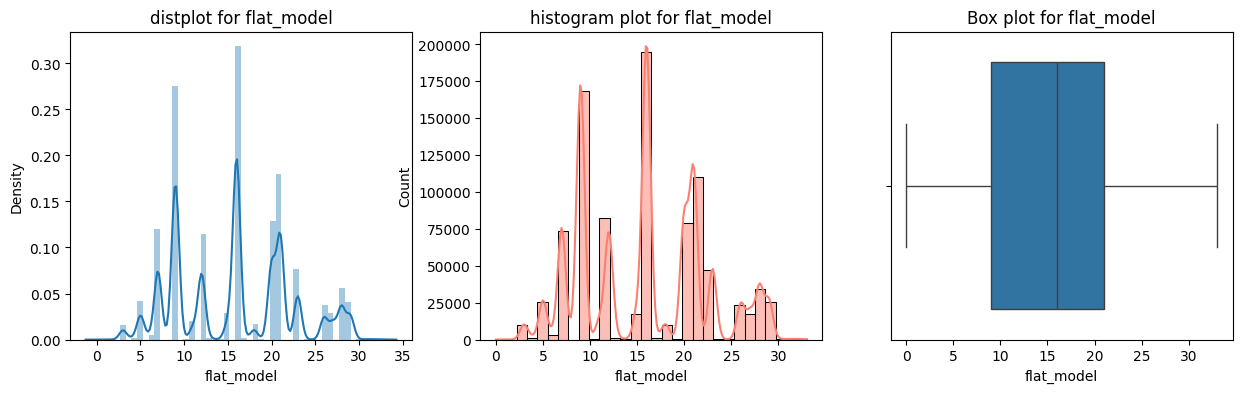

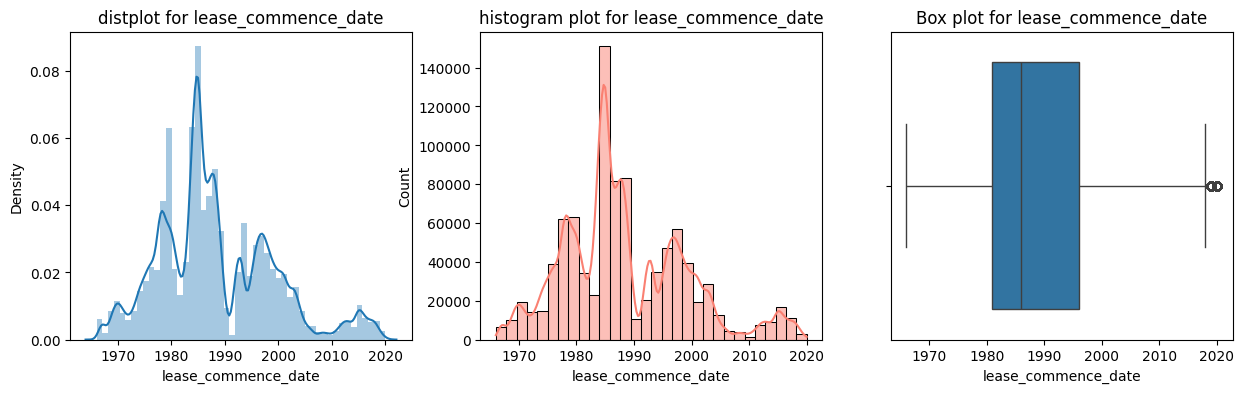

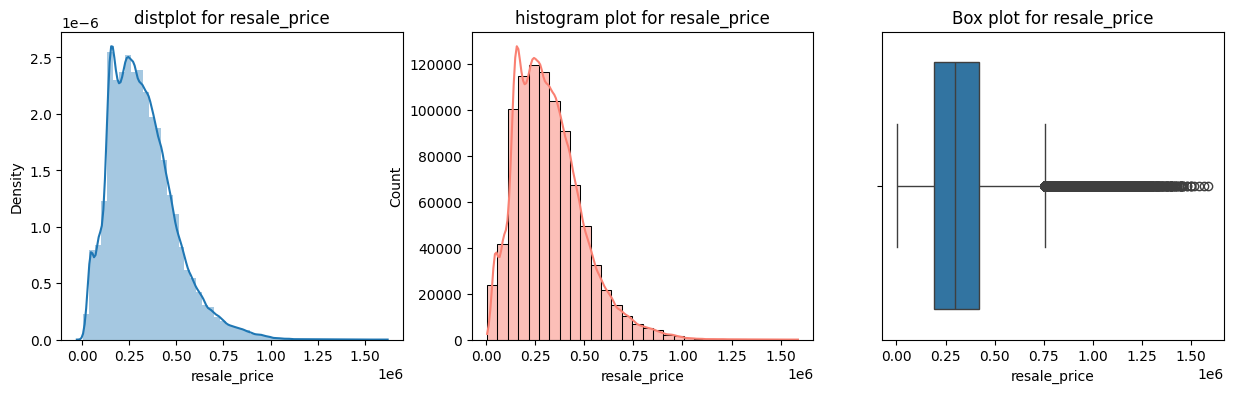

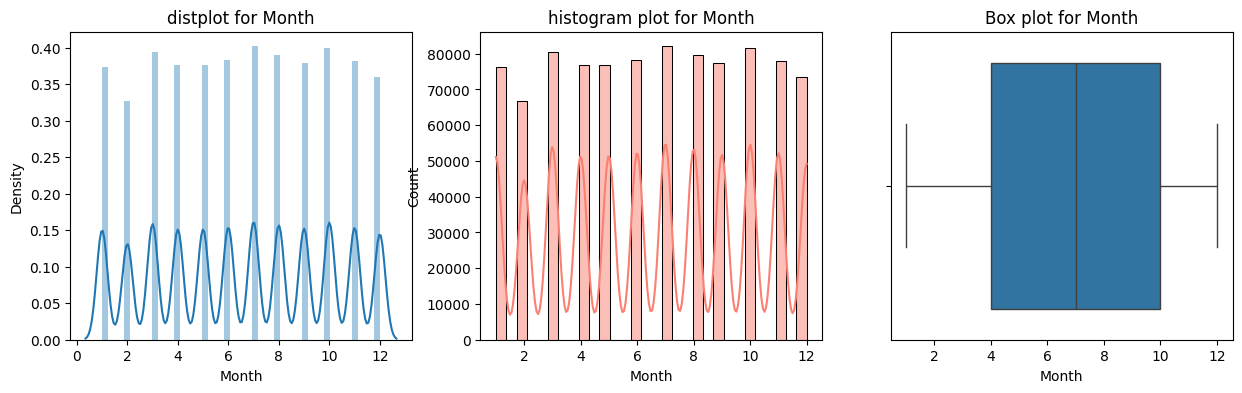

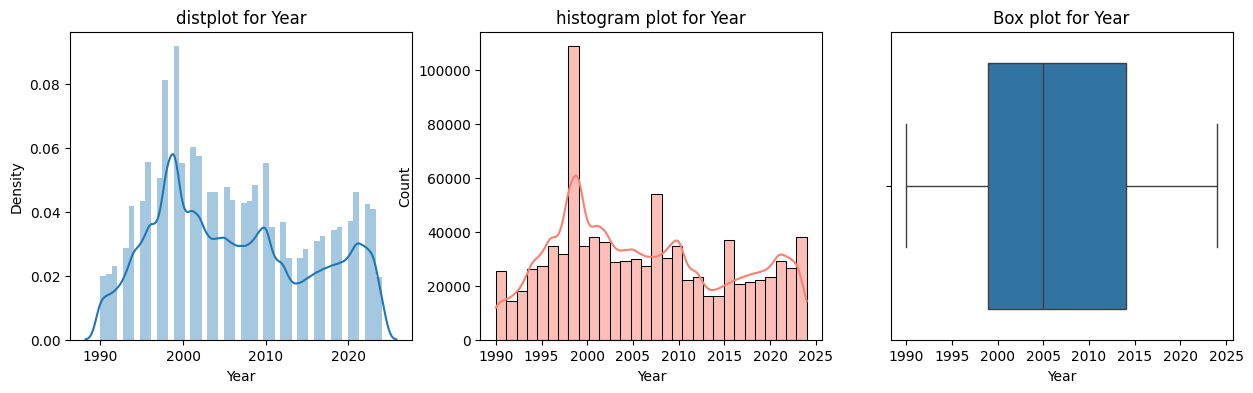

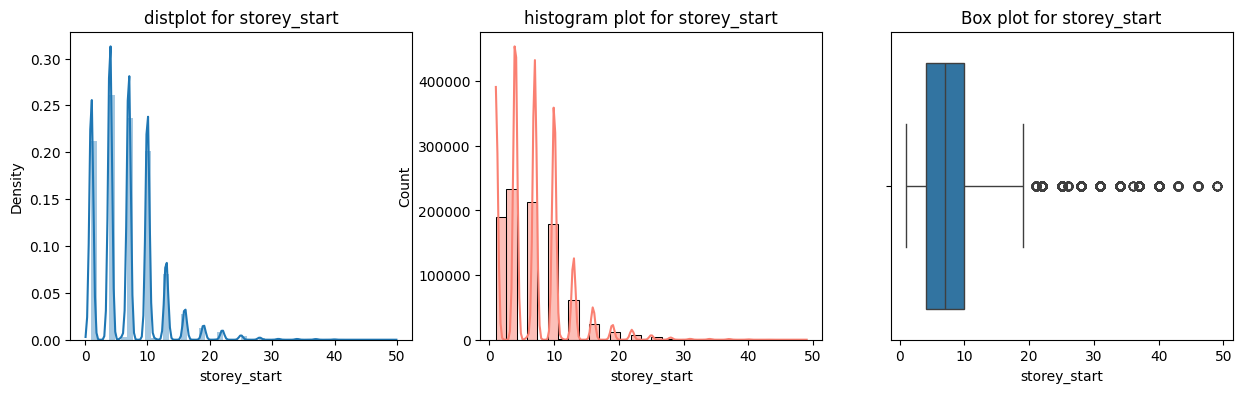

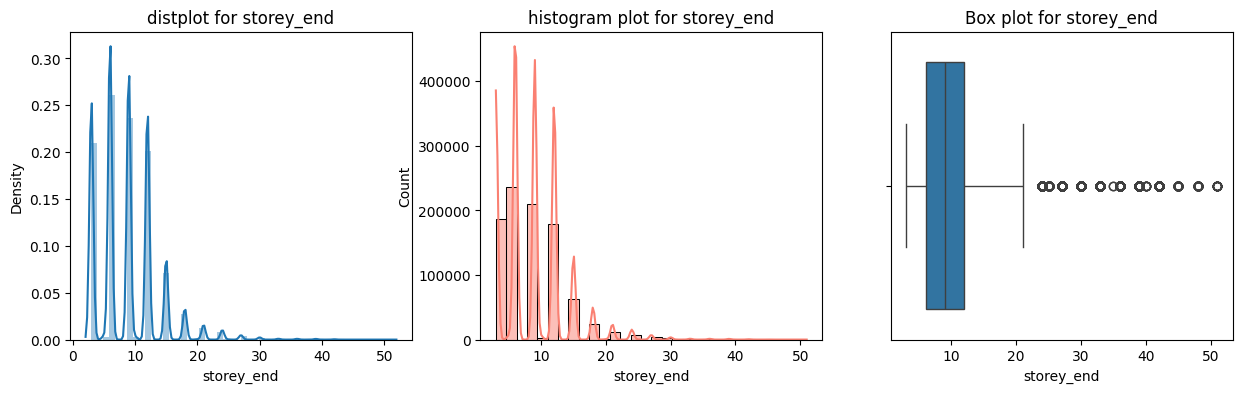

In [ ]:
for i in df.columns:
    print(plot(df,i   ))

#Handling Outlier coulumns 

Outlier columns 

1.floor area sqm
2.resale price
3.store start
4.store end 

outlier method 

IQR method removeing outliersA

In [44]:
def outlier(df,column):
  q1= df[column].quantile(0.25)
  q3= df[column].quantile(0.75)

  iqr= q3-q1

  upper_threshold= q3 + (1.5*iqr)
  lower_threshold= q1 - (1.5*iqr)

  df[column]= df[column].clip(lower_threshold, upper_threshold)
    



In [45]:
outlier_columns=["floor_area_sqm","storey_start","storey_end","resale_price"]
for j in outlier_columns:
    outlier(df,j)

C:\Users\anand\AppData\Local\Temp\ipykernel_13752\1049427475.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\anand\AppData\Local\Temp\ipykernel_13752\1049427475.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\anand\AppData\Local\Temp\ipykernel_13

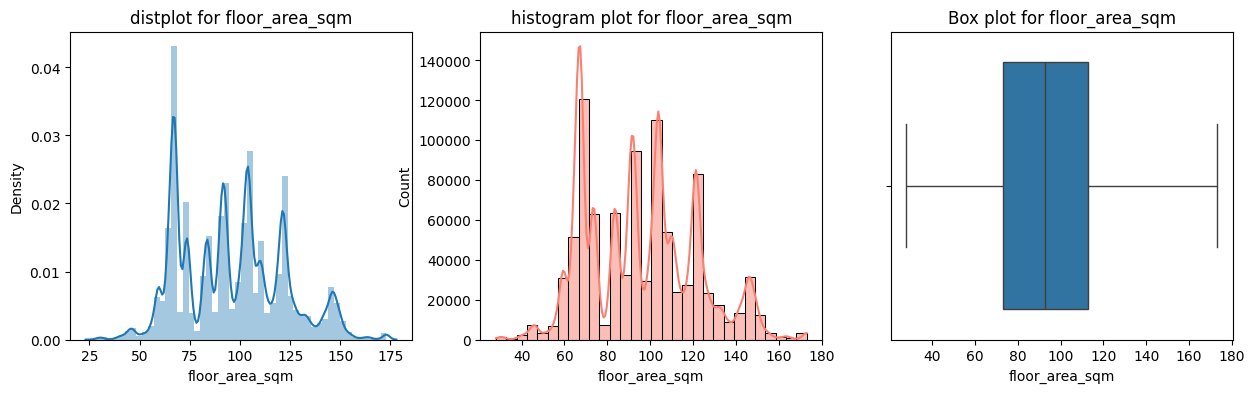

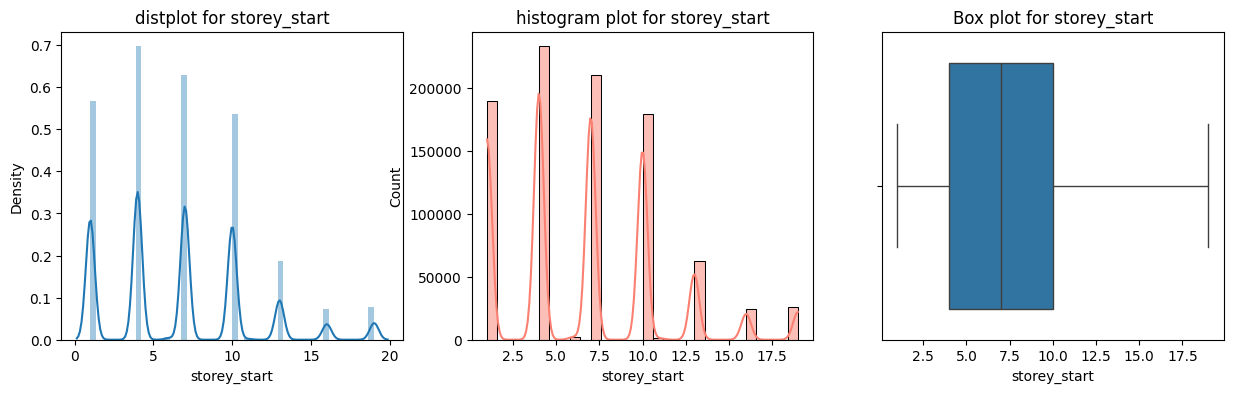

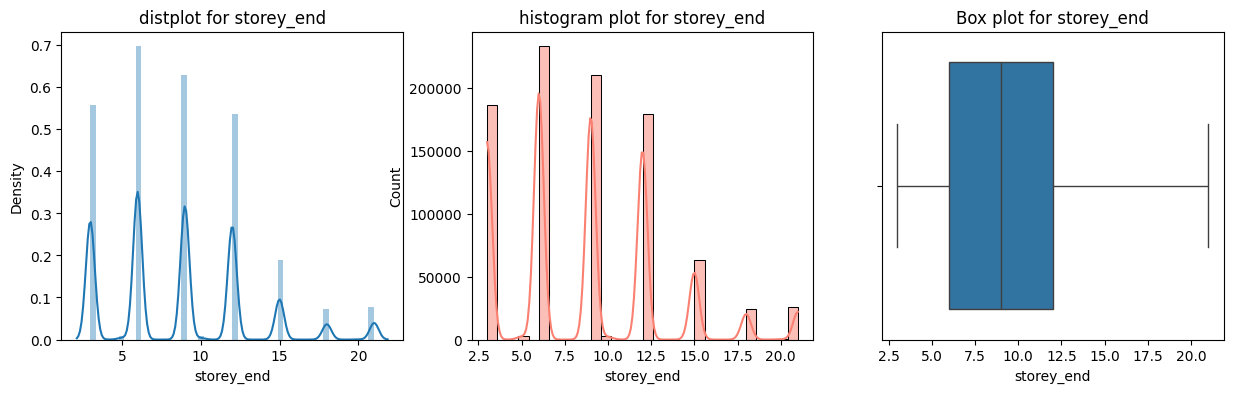

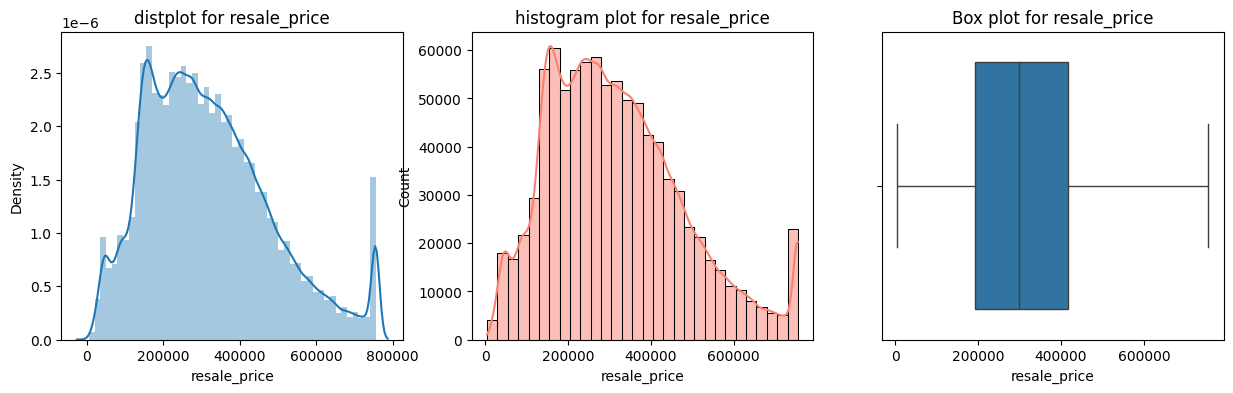

In [46]:
for k in outlier_columns:
    plot(df,k)

<Axes: >

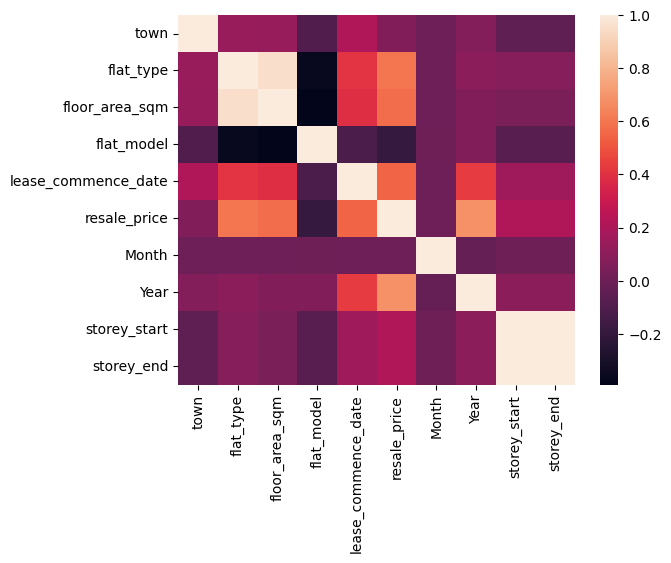

In [ ]:
sns.heatmap(df.corr(),linecolor='black')

In [48]:
result = df.to_csv("final_df.csv")